# Stock Price Prediction

## Importing Libraries

In [1]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

## Importing Dataset

In [2]:
stockPrice = pd.read_csv('/GOOGLE.csv')

In [3]:
stockPrice.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044


In [4]:
stockPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4717 non-null   object 
 1   Open    4717 non-null   float64
 2   High    4717 non-null   float64
 3   Low     4717 non-null   float64
 4   Close   4717 non-null   float64
 5   Volume  4717 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 221.2+ KB


In [5]:
stockPrice.shape

(4717, 6)

In [6]:
stockPrice.describe()

,Open,High,Low,Close,Volume
count,4717.000000,4717.000000,4717.000000,4717.000000,4.717000e+03
mean,38.960748,39.367110,38.548250,38.967184,1.231948e+08
std,35.691000,36.093669,35.293188,35.702736,1.507899e+08
min,2.482232,2.546046,2.401401,2.502753,9.312000e+06
25%,12.756507,12.887638,12.601602,12.737738,3.275200e+07
50%,26.188000,26.518019,25.909000,26.148500,6.811981e+07
75%,55.550499,56.047501,54.898998,55.494999,1.509569e+08
max,151.250000,151.546494,148.899002,149.838501,1.643023e+09


## Exploratory Data Analysis/Data Visualization

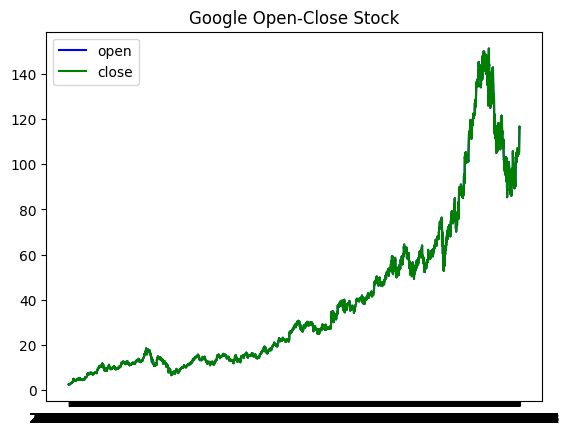

In [7]:
plt.plot(stockPrice['Date'],
         stockPrice['Open'],
         color="blue",
         label="open")

plt.plot(stockPrice['Date'],
         stockPrice['Open'],
         color="green",
         label="close")

plt.title("Google Open-Close Stock")

plt.legend()

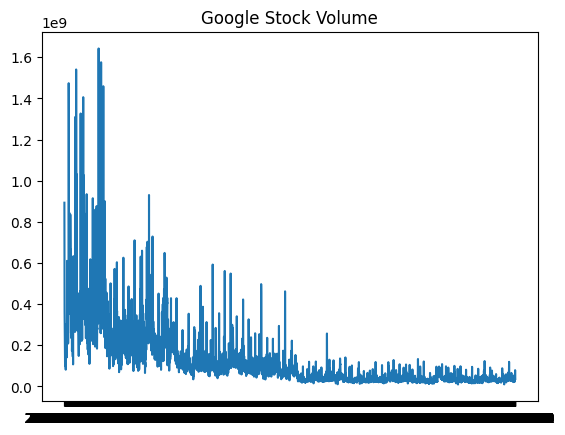

In [8]:
plt.plot(stockPrice['Date'],
         stockPrice['Volume'])

plt.title("Google Stock Volume")

plt.show()

<ipython-input-9-b8a92f0b19f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stockPrice.corr(),annot=True,cbar=False)


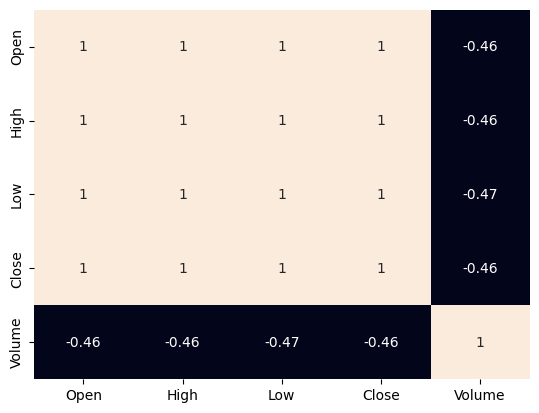

In [9]:
sns.heatmap(stockPrice.corr(),annot=True,cbar=False)

plt.show()

Text(0.5, 1.0, 'Google Stock Prices')

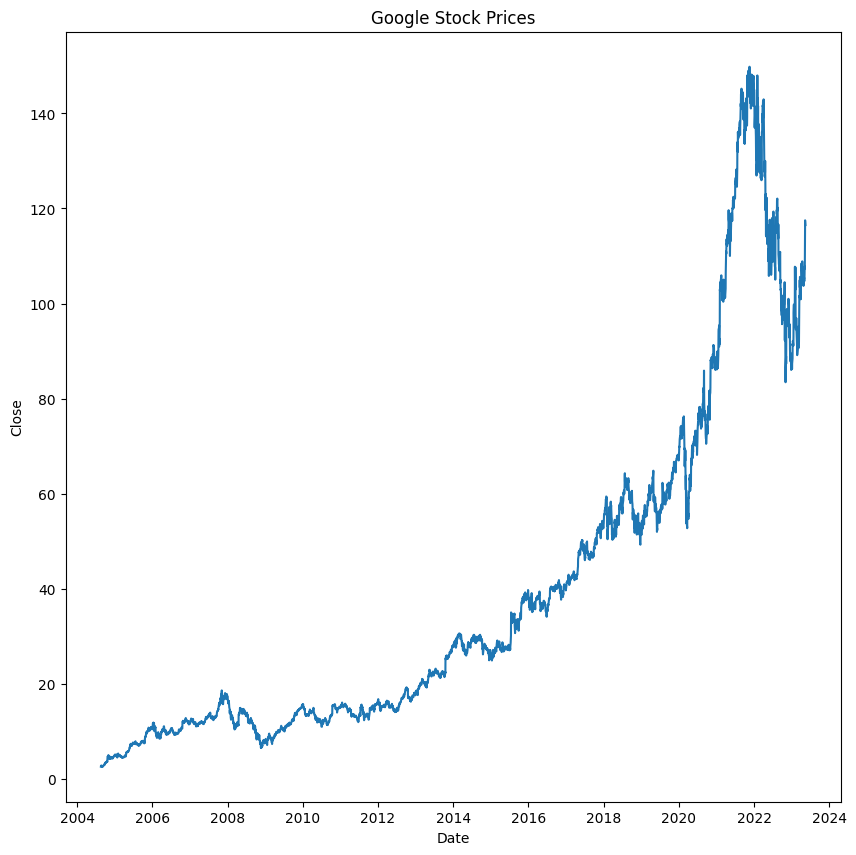

In [10]:
stockPrice['Date'] = pd.to_datetime(stockPrice['Date'])

plt.figure(figsize=(10, 10))
plt.plot(stockPrice['Date'], stockPrice['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Google Stock Prices")

In [11]:
# prepare the training set samples
stock_close = stockPrice.filter(['Close'])
dataset = stock_close.values
trainingData = int(np.ceil(len(dataset) *.95))

# scale the data
scale = StandardScaler()
scale = scale.fit_transform(dataset)

train_data = scale[0:int(trainingData), :]

x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

X_train = np.reshape(x_train,
					(x_train.shape[0],
					x_train.shape[1], 1))

## Building the Model

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape
							=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58369 (228.00 KB)
Trainable params: 58369 (228.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilation and Fitting

In [13]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
			loss='mae',
			metrics=RootMeanSquaredError())

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
139/139 [==============================] - 14s 69ms/step - loss: 0.1075 - root_mean_squared_error: 0.1841
Epoch 2/20
139/139 [==============================] - 10s 69ms/step - loss: 0.0730 - root_mean_squared_error: 0.1140
Epoch 3/20
139/139 [==============================] - 8s 58ms/step - loss: 0.0687 - root_mean_squared_error: 0.1072
Epoch 4/20
139/139 [==============================] - 10s 69ms/step - loss: 0.0659 - root_mean_squared_error: 0.1025
Epoch 5/20
139/139 [==============================] - 10s 69ms/step - loss: 0.0656 - root_mean_squared_error: 0.1039
Epoch 6/20
139/139 [==============================] - 8s 58ms/step - loss: 0.0637 - root_mean_squared_error: 0.1003
Epoch 7/20
139/139 [==============================] - 10s 69ms/step - loss: 0.0620 - root_mean_squared_error: 0.0977
Epoch 8/20
139/139 [==============================] - 11s 80ms/step - loss: 0.0652 - root_mean_squared_error: 0.1028
Epoch 9/20
139/139 [==============================] - 18s 126ms/st

## Model Evaluation

In [14]:
testingData = scale[trainingData - 60:, :]
x_test = []
y_test = dataset[trainingData:, :]
for i in range(60, len(testingData)):
	x_test.append(testingData[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
					(x_test.shape[0],
					x_test.shape[1], 1))

pred = model.predict(X_test)

8/8 [==============================] - 1s 18ms/step


<ipython-input-15-ee695050beb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


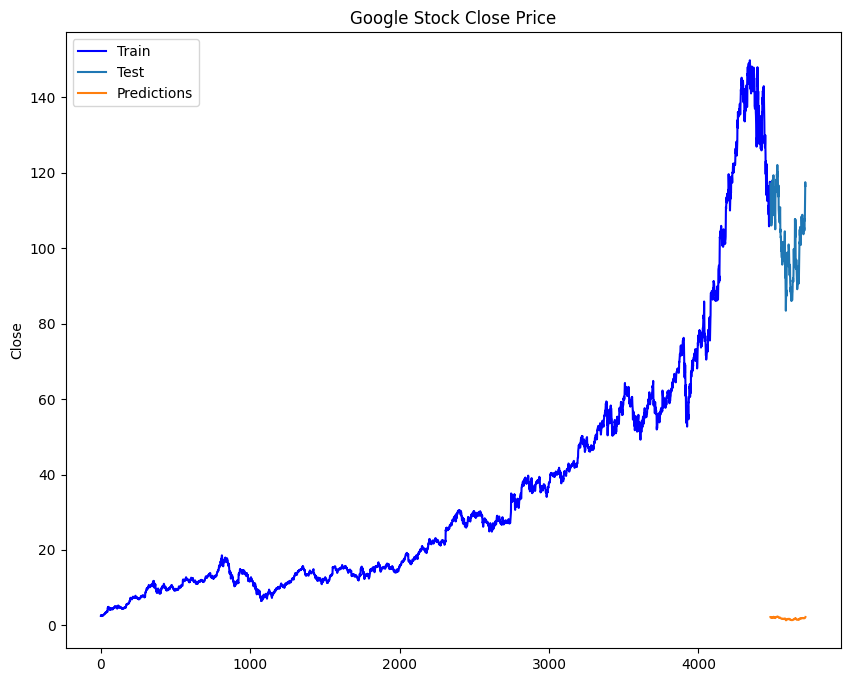

In [15]:
train = stockPrice[:trainingData]
test = stockPrice[trainingData:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['Close'], c="b")
plt.plot(test[['Close', 'Predictions']])
plt.title('Google Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
